<a href="https://colab.research.google.com/github/HemalathaSivasankaran/chennai-house-price-ped/blob/main/Chennai_House_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **Statement**

---


Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home.
Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. 
Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build
homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price
prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are 
fetching more money for the houses?

# **Minimum Requirements**

---


It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# **Importing Python Packages:**

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
data = pd.read_csv("/content/drive/MyDrive/train-chennai-sale.csv")

In [4]:
data.head()
data.shape

(7109, 22)

# **Data Cleaning**

---



In [5]:
data.columns#getting the column names

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [6]:
data.isnull().sum()#checking is there any missing values in the columns

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

#Correcting the spellings in the given data

---



In [7]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
data.AREA = data.AREA.replace({'Velchery':'Velachery', 
                               'KKNagar':'KK Nagar', 
                               'TNagar':'T Nagar', 
                               'Chormpet':'Chrompet', 
                               'Chrompt':'Chrompet', 
                               'Chrmpet':'Chrompet', 
                               'Ana Nagar':'Anna Nagar', 
                               'Ann Nagar':'Anna Nagar',
                               'Karapakam':'Karapakkam', 
                               'Adyr':'Adyar'})

In [9]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [10]:
data.SALE_COND = data.SALE_COND.replace({'Adjland':'Adjland', 
                                         'Adj Land':'Adjland',
                                         'AdjLand' : 'Adjland',
                                         'Normal sale':'Normal sale',
                                         'Partiall':'Partial',
                                         'Abnormal':'AbNormal',
                                         'Ab Normal':'AbNormal',
                                         'PartiaLl':'Partial'})
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Adjland', 'Normal Sale'],
      dtype=object)

In [11]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':'No'})
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':'Commercial', 
                       'Others':'Other'})
data.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [13]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [14]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':'AllPub',
                                                 'Allpub' : 'All Pub',
                                                 'NoSeWa' : 'NoSewr',
                                                 'NoSewr ': 'NoSewr'});
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [15]:
data.STREET = data.STREET.replace({'Pavd':'Paved', 
                       'NoAccess':'No Access'})
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [16]:
data.describe()#getting the outliers

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [17]:
data.dtypes#getting the datatypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [18]:
data["DATE_BUILD"] = pd.to_datetime(data["DATE_BUILD"],format='%d-%m-%Y')#changing the datatypes
data["DATE_SALE"] = pd.to_datetime(data["DATE_SALE"],format='%d-%m-%Y')#changing the datatypes


In [19]:
data.N_BEDROOM.value_counts()
data["N_BEDROOM"].fillna(1.63,inplace=True)#imputing missing values using mean value
data.N_BATHROOM .value_counts()
data["N_BATHROOM"].fillna(1.21,inplace=True)#imputing missing values using mean value
data.QS_OVERALL.value_counts()
data["QS_OVERALL"].fillna(3.50,inplace=True)#imputing missing values using mean value


In [20]:
data["N_BEDROOM"]=data["N_BEDROOM"].astype(int)#changing the datatypes
data["N_BATHROOM"]=data["N_BATHROOM"].astype(int)#changing the datatypes


In [21]:
data['PROPERTY_AGE'] = pd.DatetimeIndex(data.DATE_SALE).year - pd.DatetimeIndex(data.DATE_BUILD).year#creating the new column

In [22]:
data['TOTAL_PRICE'] = pd.DataFrame(data.REG_FEE	+ data.COMMIS+ data.SALES_PRICE)#creating the new column

In [23]:
data = data.reindex(columns = ['PRT_ID', 'AREA','SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','DATE_BUILD','DATE_SALE','PROPERTY_AGE','INT_SQFT','DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE','TOTAL_PRICE' ])#rearranging the columns

In [24]:
data.columns

Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'DATE_BUILD', 'DATE_SALE',
       'PROPERTY_AGE', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_PRICE'],
      dtype='object')

In [25]:
data.dtypes

PRT_ID                   object
AREA                     object
SALE_COND                object
PARK_FACIL               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
DATE_BUILD       datetime64[ns]
DATE_SALE        datetime64[ns]
PROPERTY_AGE              int64
INT_SQFT                  int64
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
TOTAL_PRICE               int64
dtype: object

In [26]:
data.head()

PRT_ID        AREA SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET  \
0  P03210  Karapakkam  AbNormal        Yes  Commercial        AllPub   Paved   
1  P09411  Anna Nagar  AbNormal         No  Commercial        AllPub  Gravel   
2  P01812       Adyar  AbNormal        Yes  Commercial           ELO  Gravel   
3  P05346   Velachery    Family         No       Other        NoSewr   Paved   
4  P06210  Karapakkam  AbNormal        Yes       Other        AllPub  Gravel   

  MZZONE DATE_BUILD  DATE_SALE  ...  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      A 1967-05-15 2011-05-04  ...           1       3       4.0   
1     RH 1995-12-22 2006-12-19  ...           1       5       4.9   
2     RL 1992-02-09 2012-02-04  ...           1       3       4.1   
3      I 1988-03-18 2010-03-13  ...           2       5       4.7   
4      C 1979-10-13 2009-10-05  ...           1       3       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0          3.9         4.9       4.330   380000  144400      7600000   
1          4.2         2.5       3.765   760122  304049     21717770   
2          3.8         2.2       3.090   421094   92114     13159200   
3          3.9         3.6       4.010   356321   77042      9630290   
4          2.5         4.1       3.290   237000   74063      7406250   

   TOTAL_PRICE  
0      8124400  
1     22781941  
2     13672408  
3     10063653  
4      7717313  

[5 rows x 24 columns]

# **Exploratory Data Analysis**

---



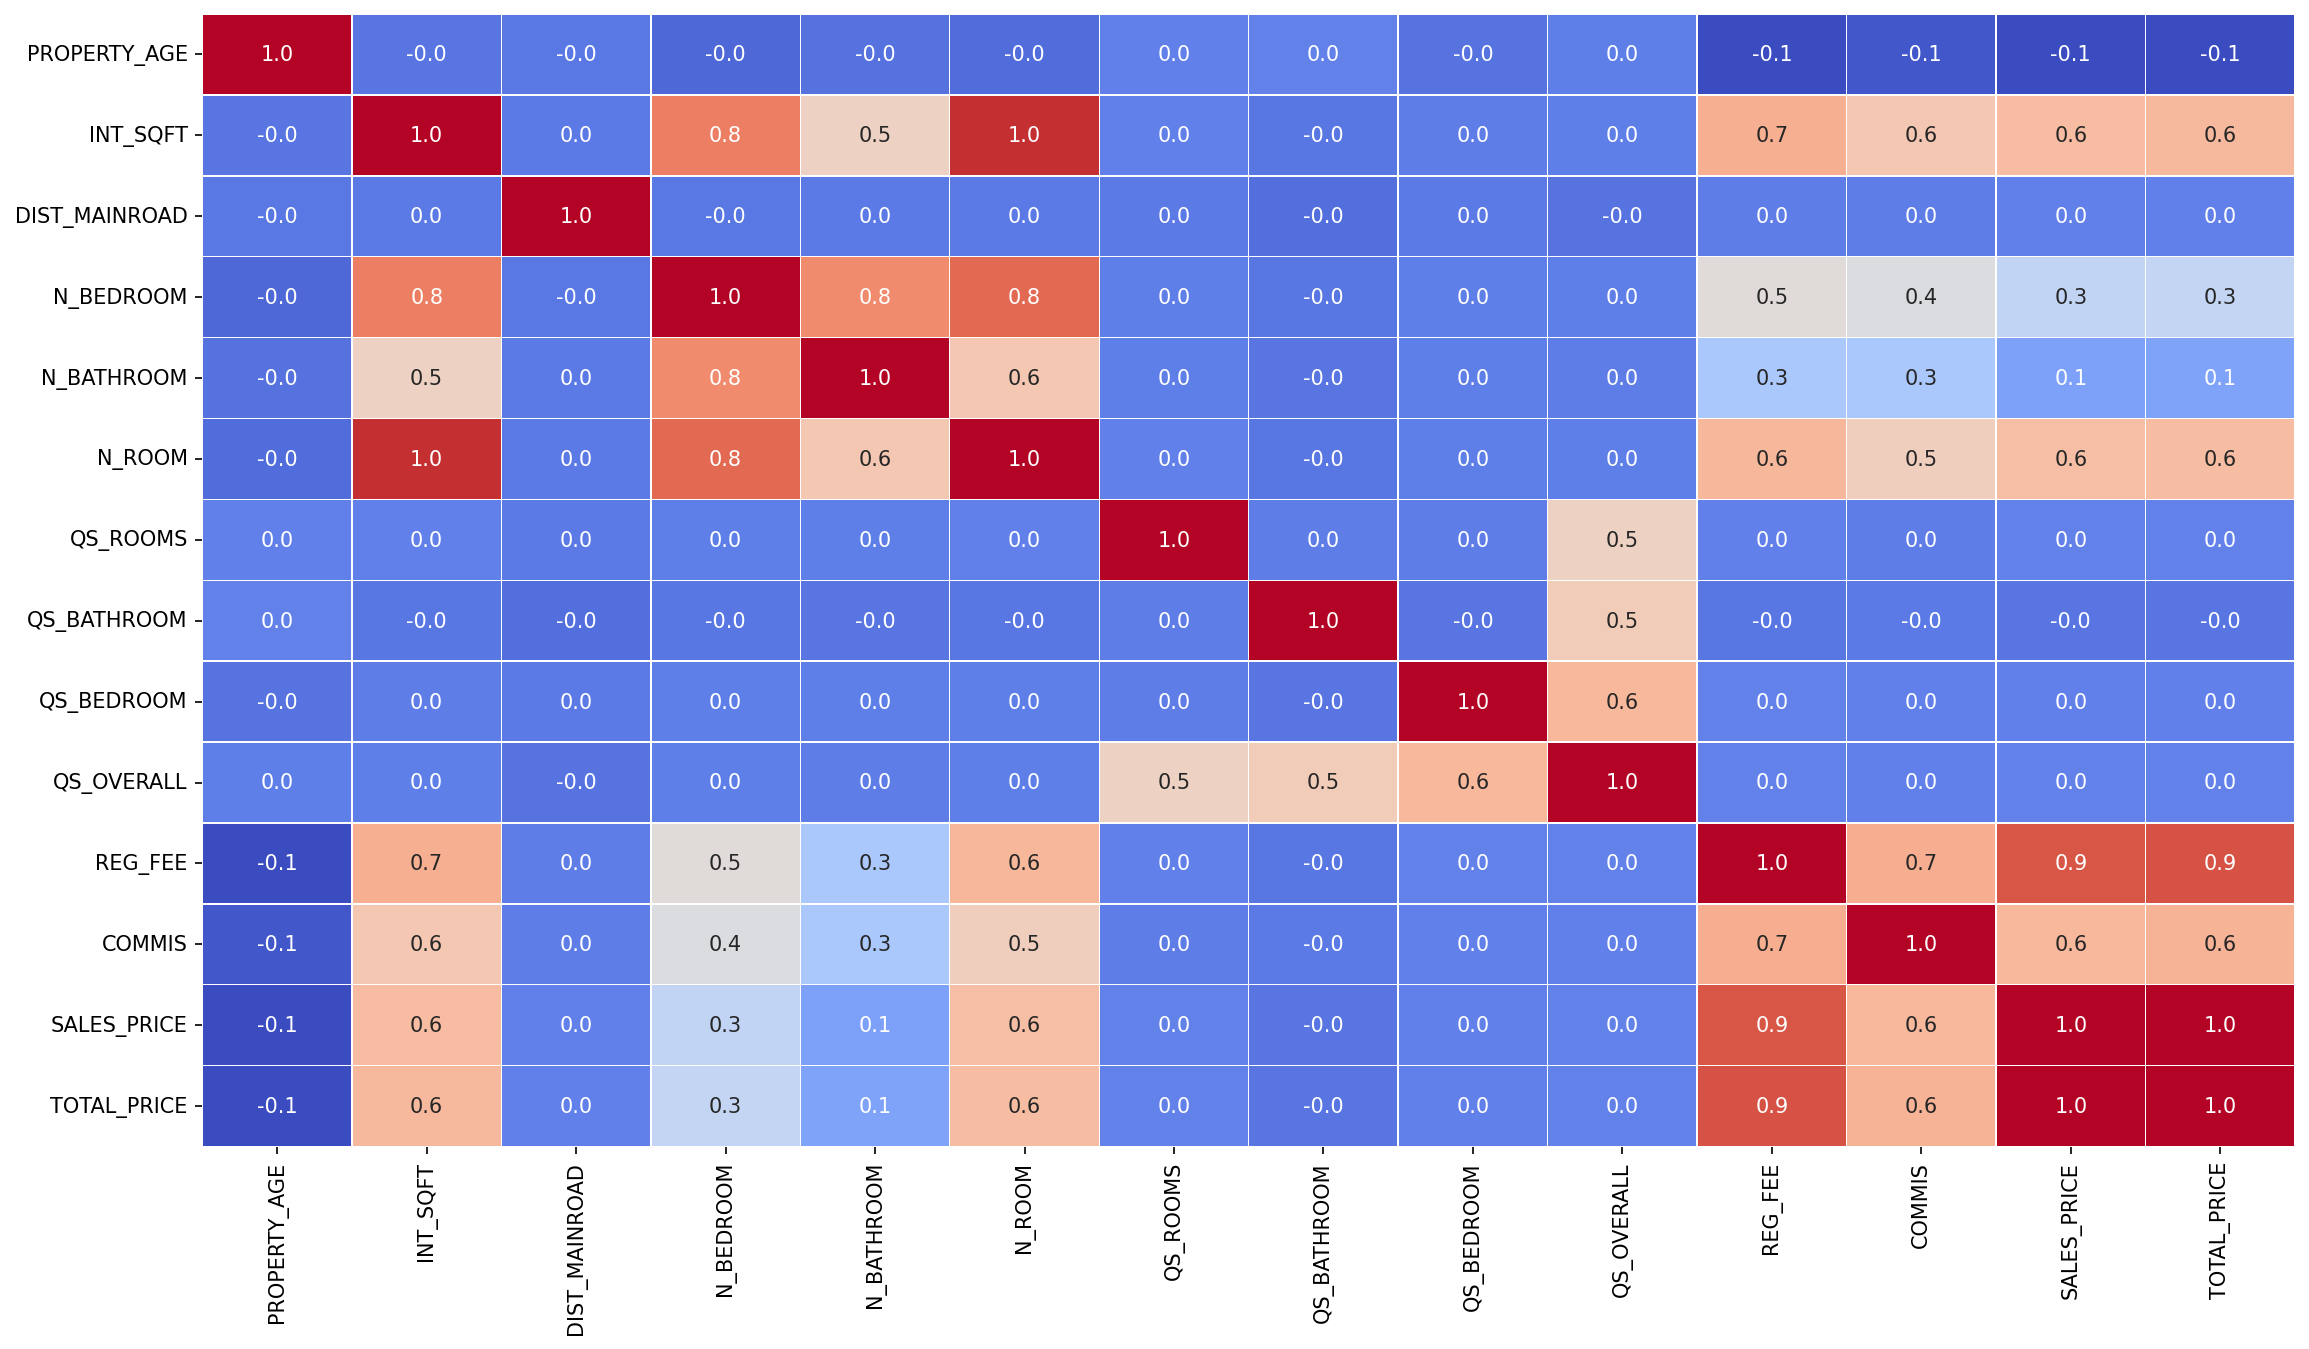

In [27]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');


Interpretation:

---



Here as we can see that in numerical columns there are some correlation between target and features which are shown in reddish colour.



# Importing The Libraries

---



In [28]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")


# **Distribution Of Features in Data Columns**

---



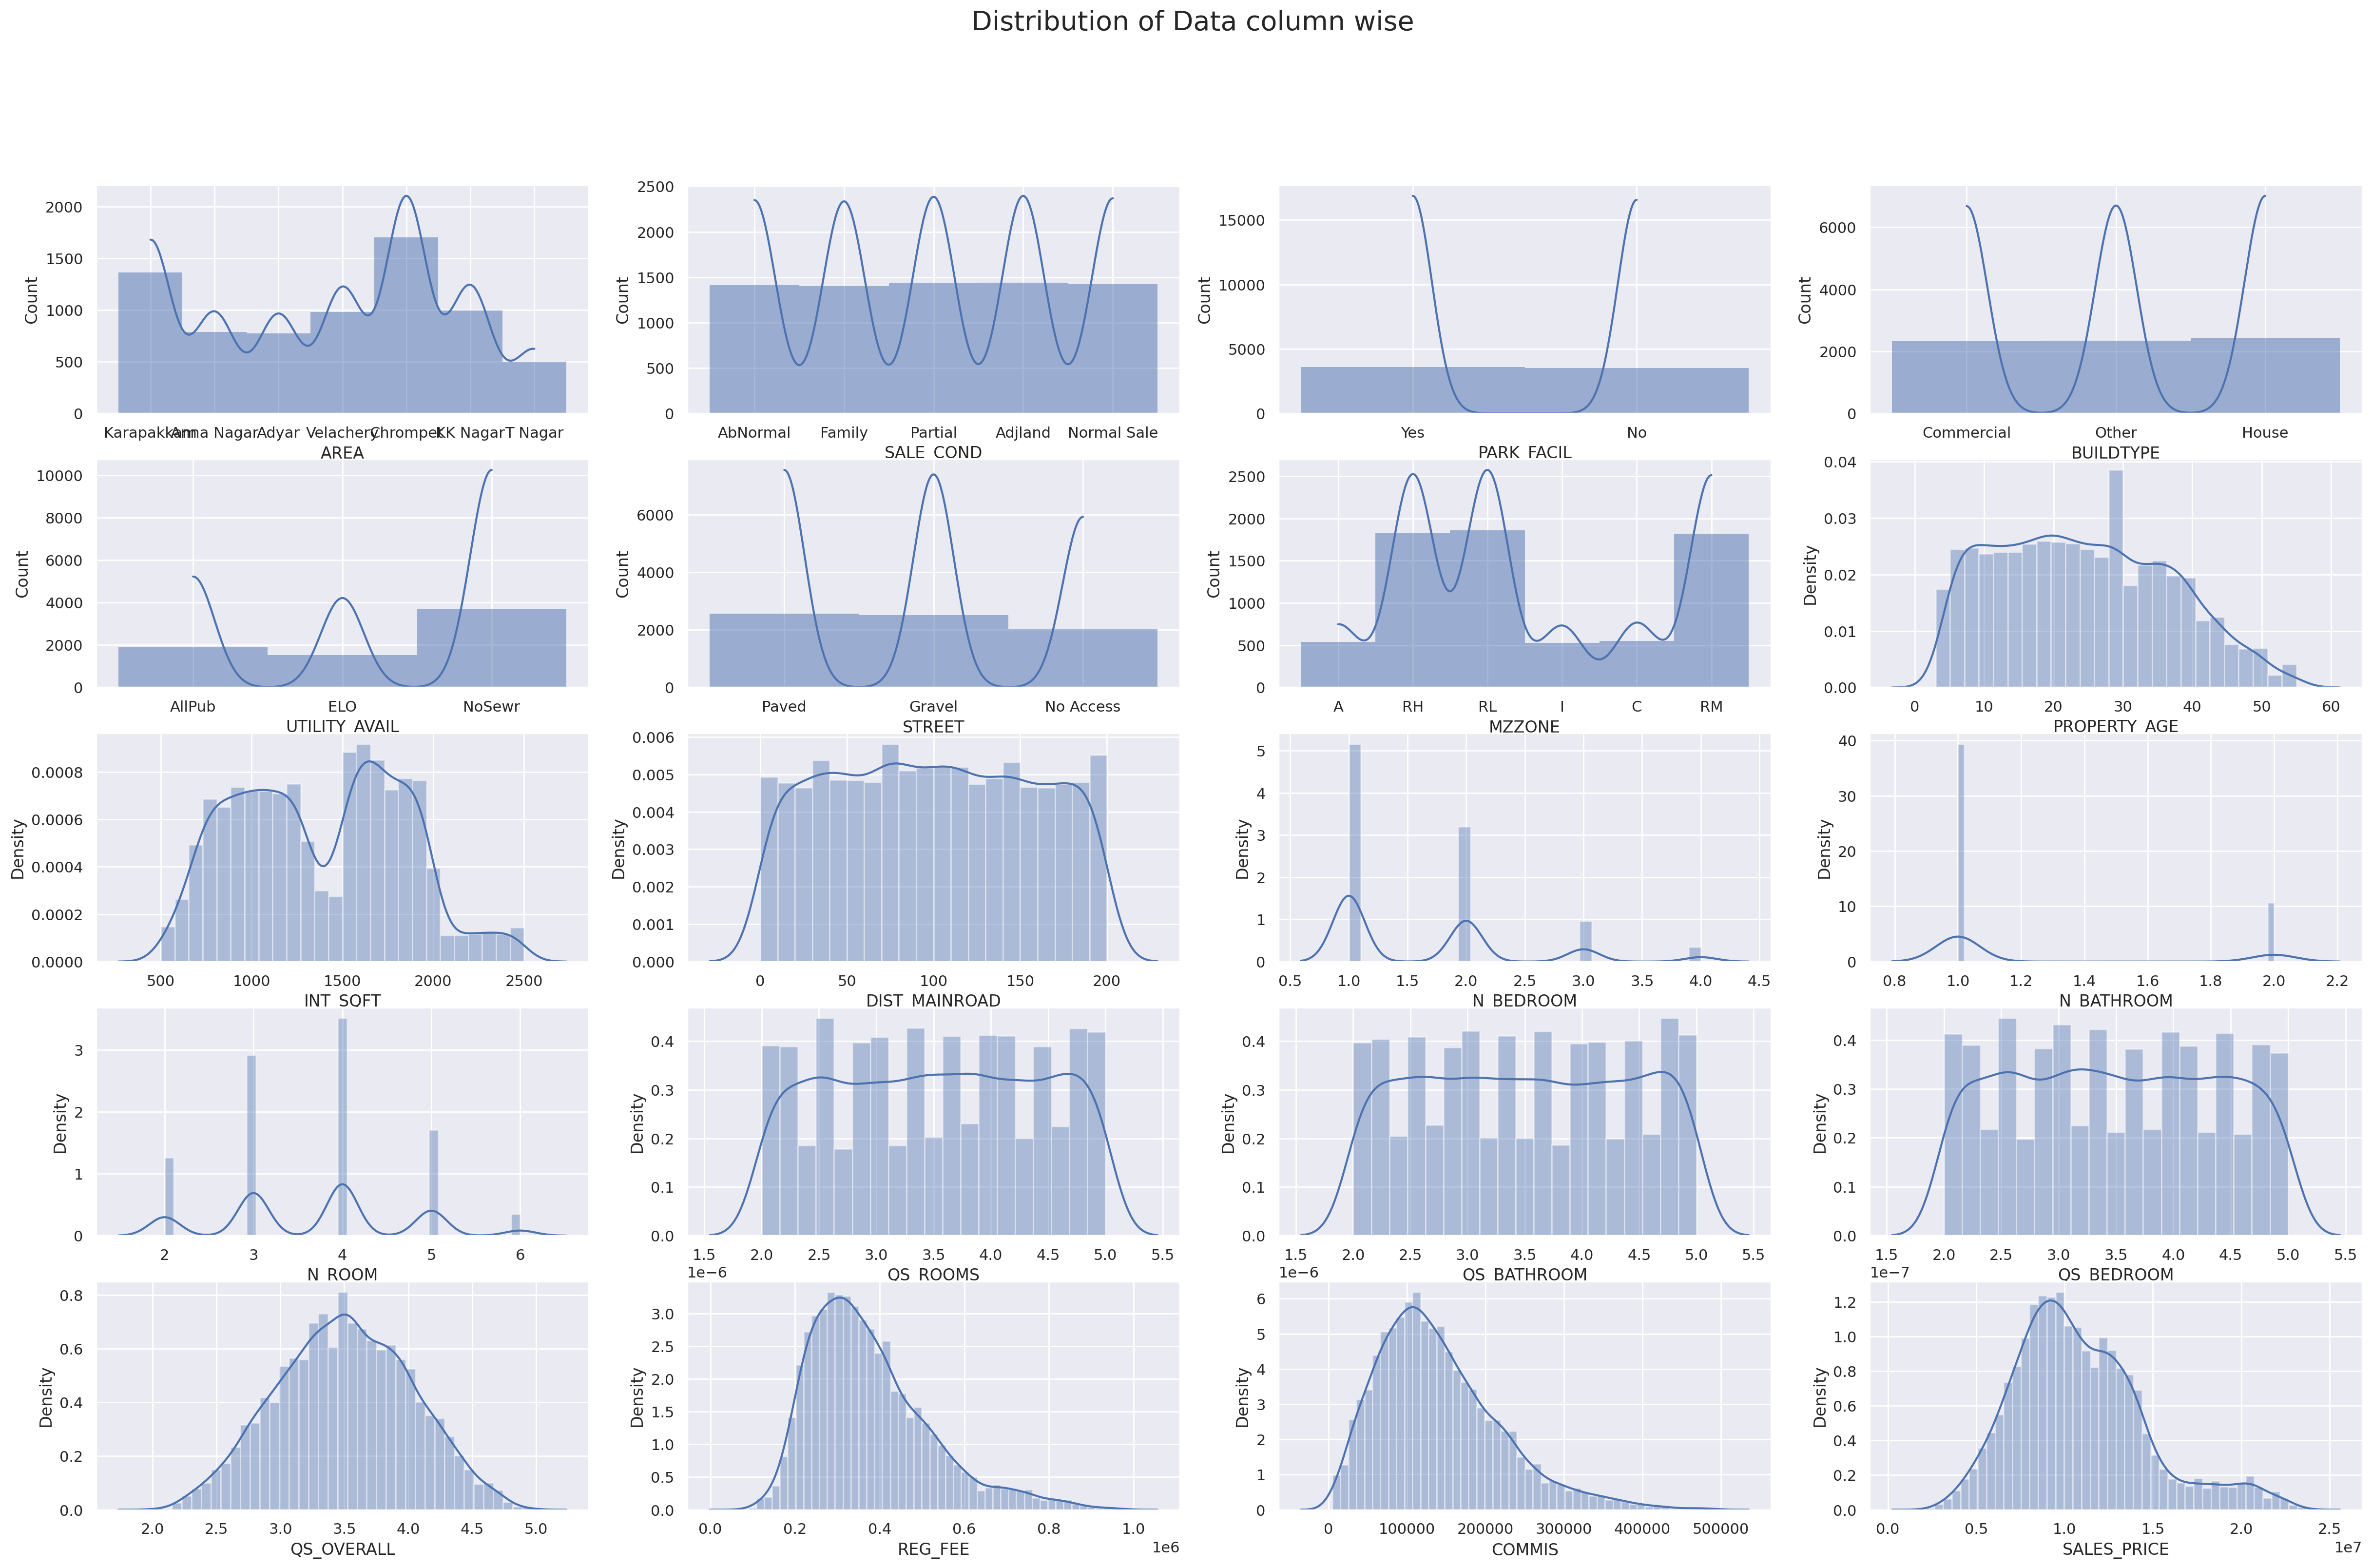

In [29]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.BUILDTYPE, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.UTILITY_AVAIL, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.STREET, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.MZZONE, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(data.PROPERTY_AGE)

plt.subplot(5,4,9)
sns.distplot(data.INT_SQFT)

plt.subplot(5,4,10)
sns.distplot(data.DIST_MAINROAD)

plt.subplot(5,4,11)
sns.distplot(data.N_BEDROOM)

plt.subplot(5,4,12)
sns.distplot(data.N_BATHROOM)

plt.subplot(5,4,13)
sns.distplot(data.N_ROOM)

plt.subplot(5,4,14)
sns.distplot(data.QS_ROOMS)

plt.subplot(5,4,15)
sns.distplot(data.QS_BATHROOM)

plt.subplot(5,4,16)
sns.distplot(data.QS_BEDROOM)

plt.subplot(5,4,17)
sns.distplot(data.QS_OVERALL)

plt.subplot(5,4,18)
sns.distplot(data.REG_FEE)

plt.subplot(5,4,19)
sns.distplot(data.COMMIS)

plt.subplot(5,4,20)
sns.distplot(data.SALES_PRICE)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

Interpretation:-

---



Here as we can see the distribution of data in all the columns are normally distributed in most of the cases and in very few column thd data is very slightly skewed.

# Plotting Features column vs Target column

---


Here we plot two type of data:
*   Numerical Columns
*   Categorical columns


# **Plotting of Numerical data vs Target**

---


Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales.

Here we plot 2 type of numerical data:
*  Continous numerical variable
*  Discrete numerical variable

# **1) Numerical Columns**
---


1) Continous numerical variable Here we are plotting all our Continous numerical variable columns with total price of the house to figure out, is there any relation between Continous numerical variable features column and total sales.

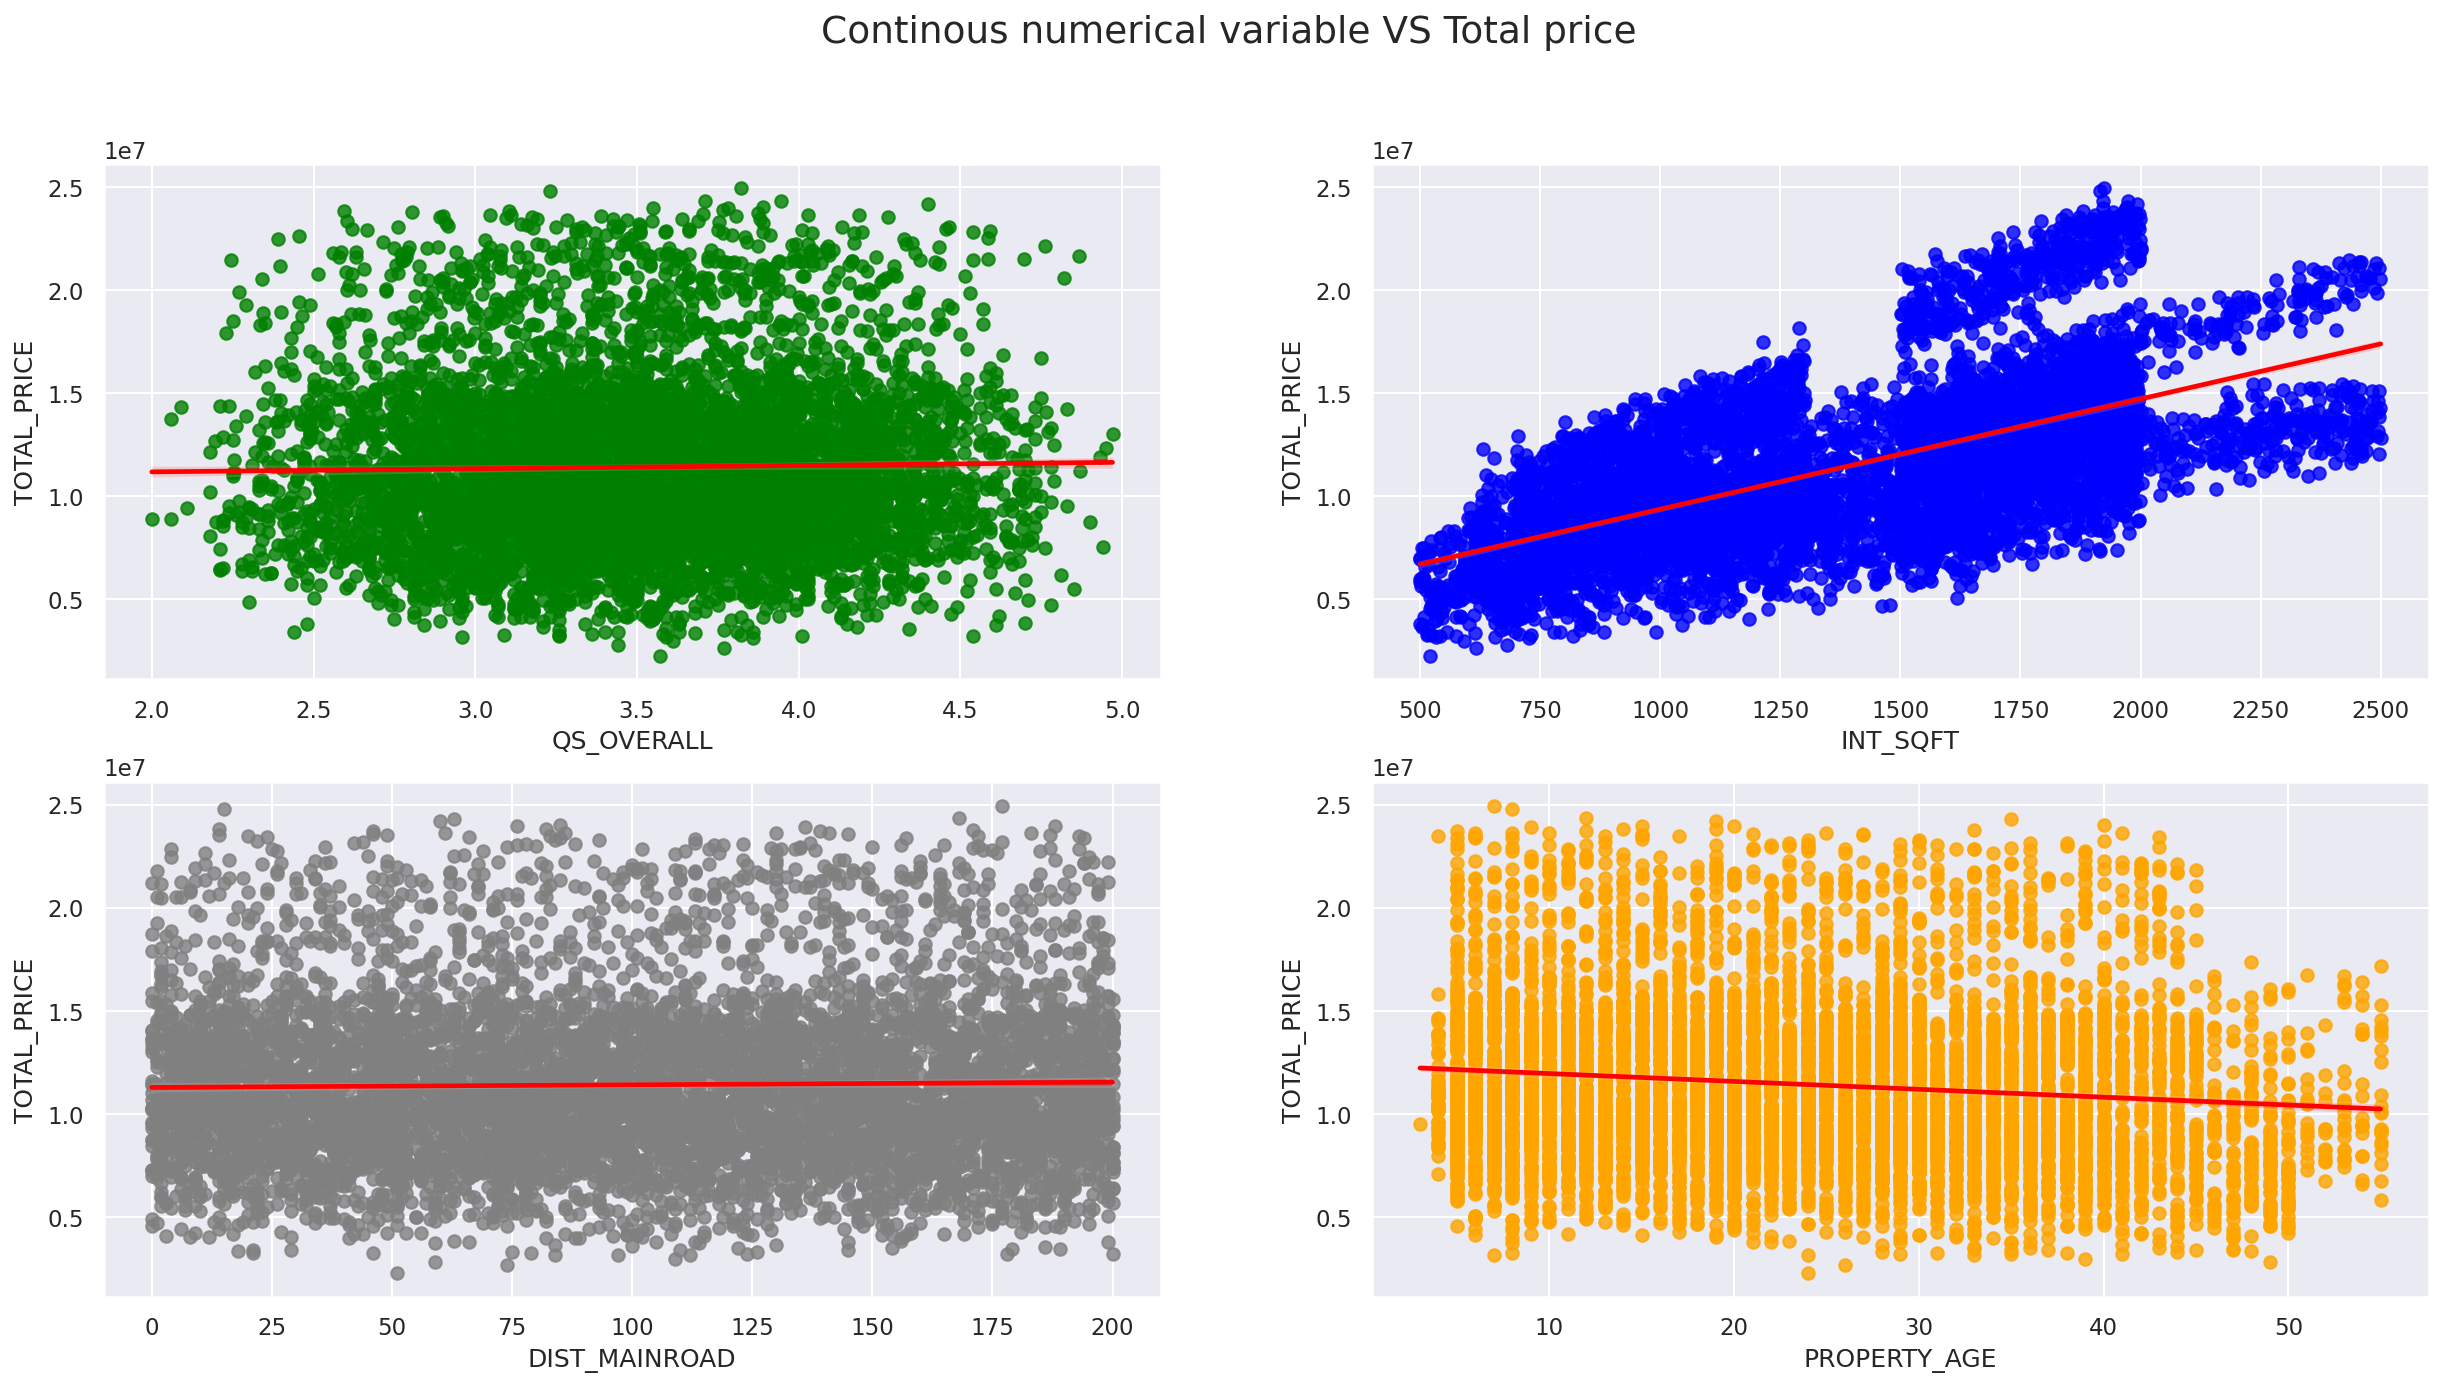

In [30]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(data.QS_OVERALL, data.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(data.INT_SQFT, data.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(data.DIST_MAINROAD, data.TOTAL_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(data.PROPERTY_AGE, data.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

Interpretation:-

---



Here we can come to conclusion that:
 
*   In QS_OVERALL we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In INT_SQRT we find good relation so this feature will be very important for us so we will keep it.
*  In DIST_MAINROAD we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*  In PROPERTY_AGE we find small relation so this feature will be useful for us so we will keep it


# **2**) Discrete numerical variable

---


Here we are plotting all our Decsrete numerical variable columns with total price of the house to figure out, is there any relation between Decsrete numerical variable features column and total sales.



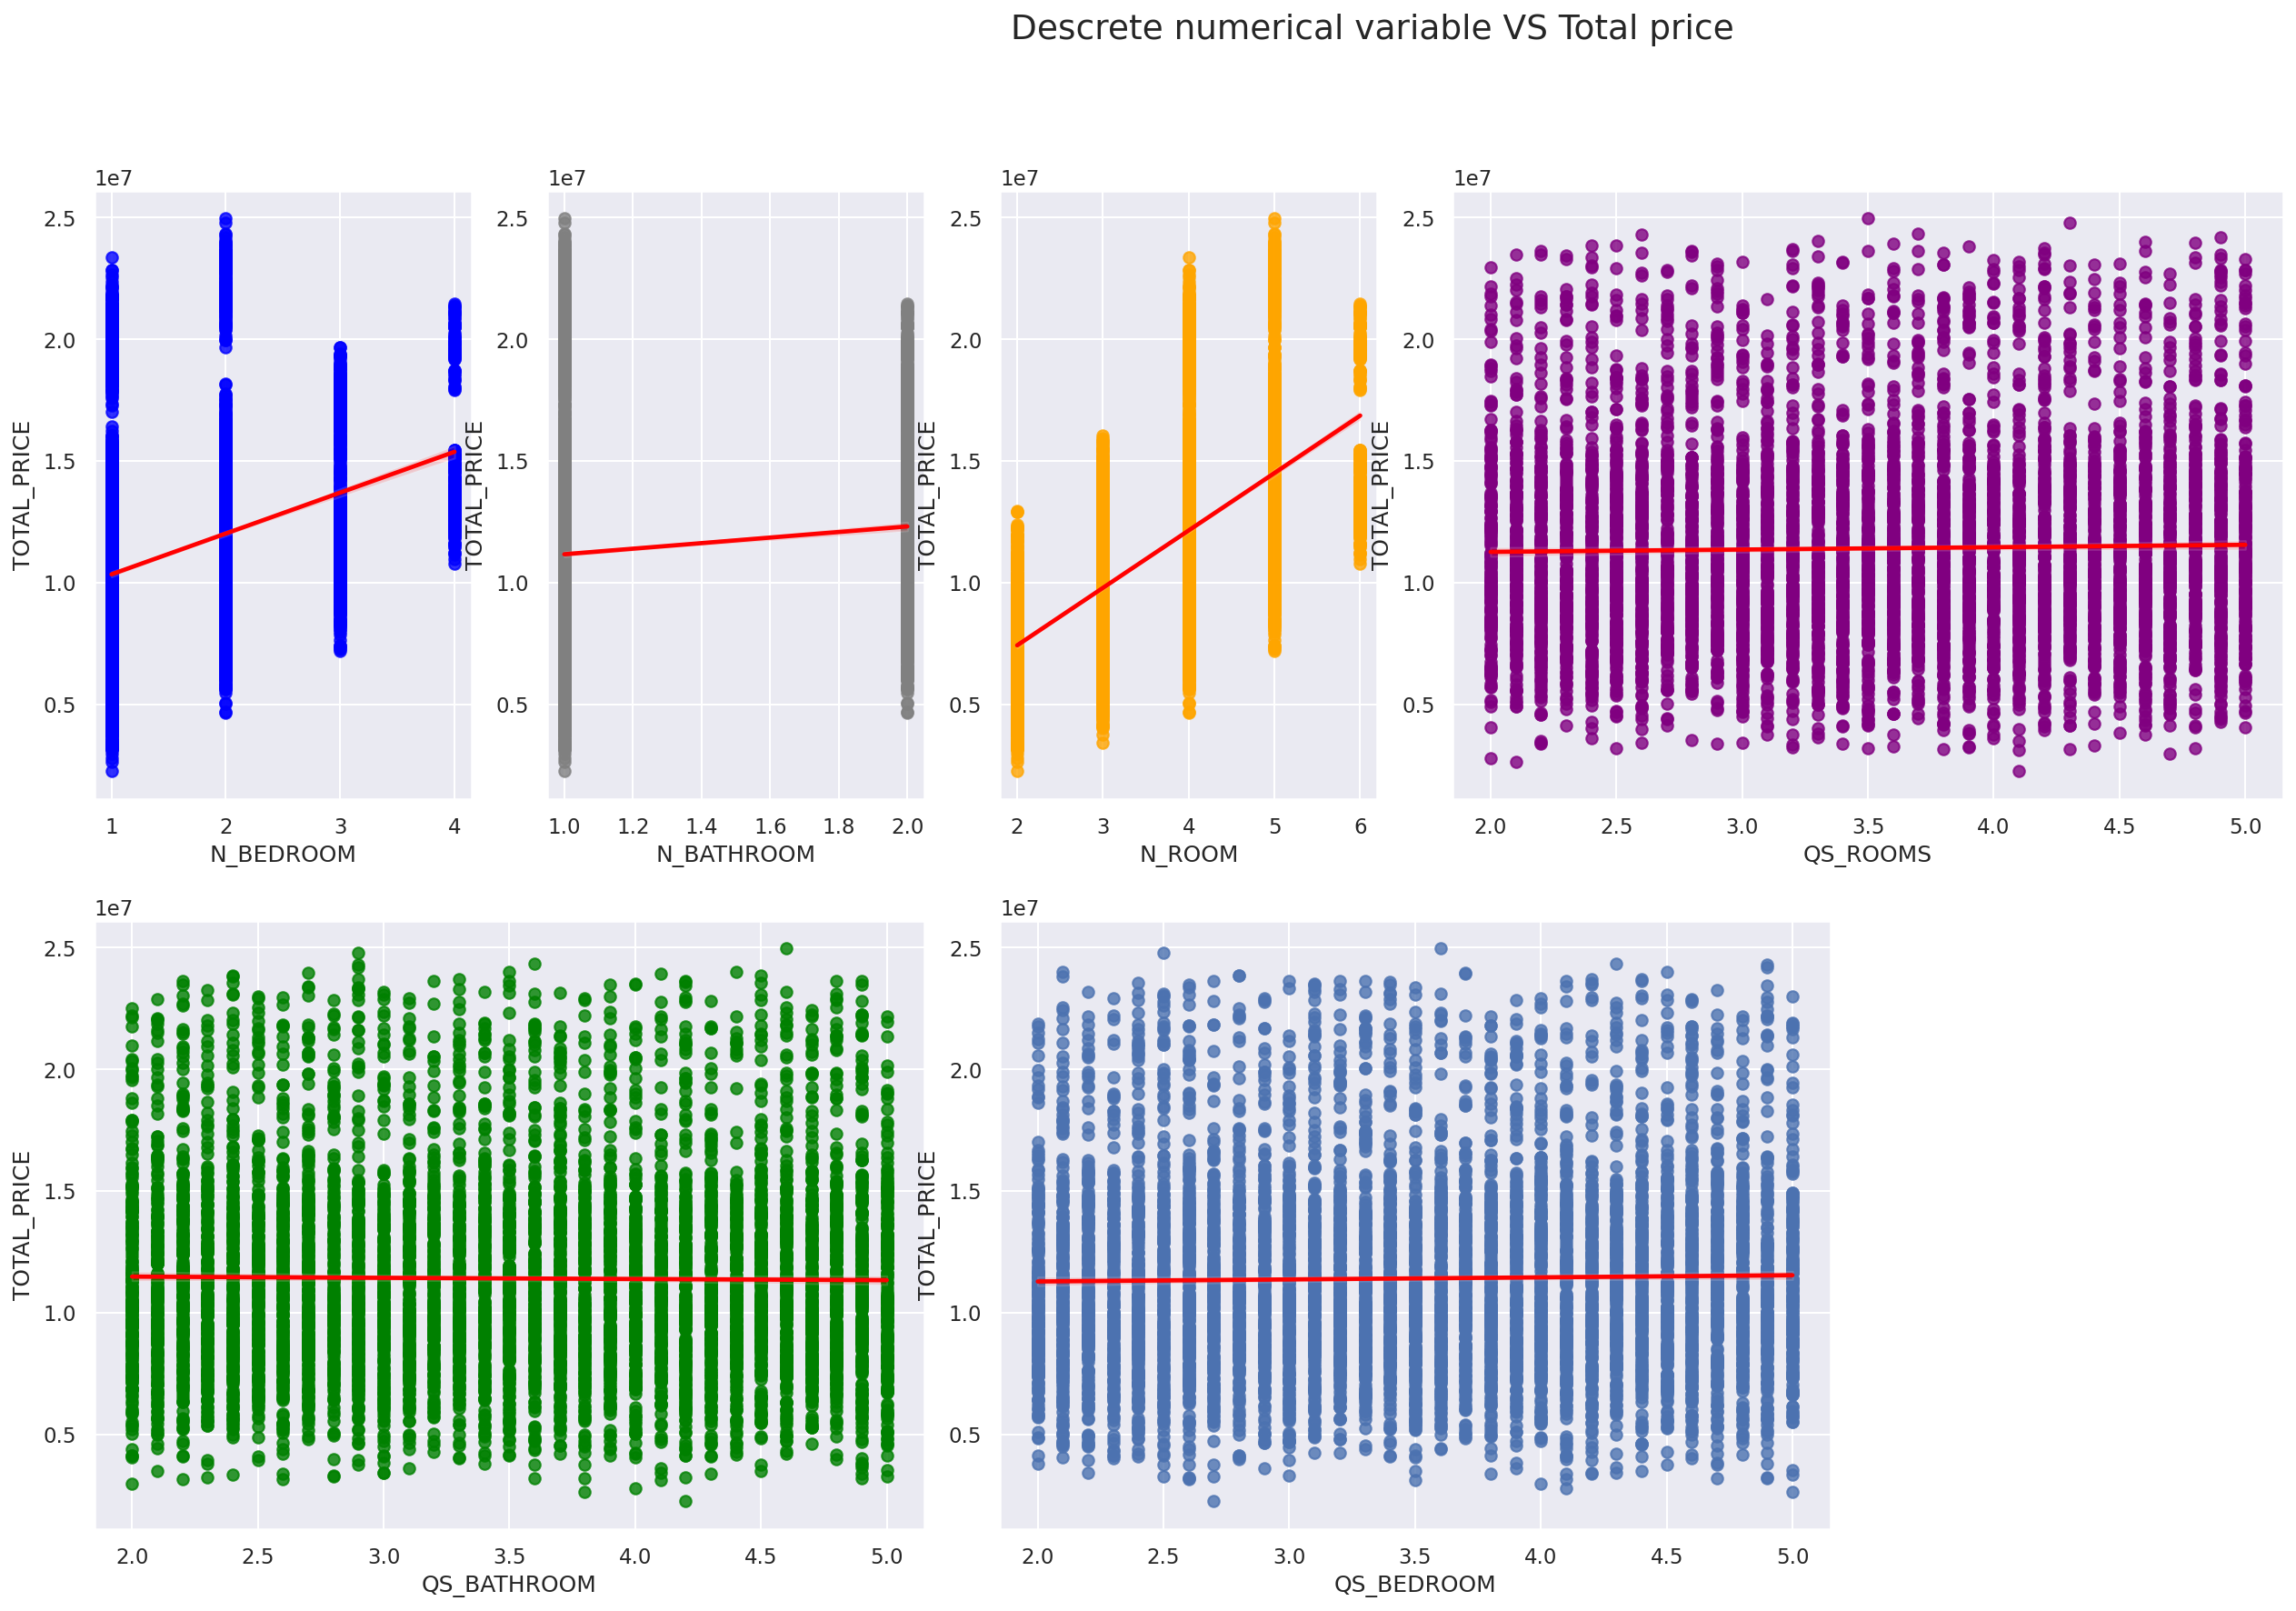

In [31]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(data.N_BEDROOM, data.TOTAL_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(data.N_BATHROOM, data.TOTAL_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(data.N_ROOM, data.TOTAL_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(data.QS_ROOMS, data.TOTAL_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(data.QS_BATHROOM, data.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(data.QS_BEDROOM, data.TOTAL_PRICE, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()


Interpretation:-

---



*  In N_BEDROOM we find good relation so this feature will be very important for us so we will keep it.

*  In N_BATHROOM we find small relation so this feature will be useful for us so we will keep it.

*   In N_ROOM we find good relation so this feature will be very important for us so we will keep it.
*  In QS_ROOMS we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

*  n QS_BEDROOM we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.




# **Commision and Registration fee columns**

---


On top of all numerical columns we are given registration fee and commission columns on which sales price don't depends on but these two columns are completly depended on sales column value. That means after determining the sales price the commission and registration fee are paid. Hence, these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price. And at the end compare this result with only predicted sales price.

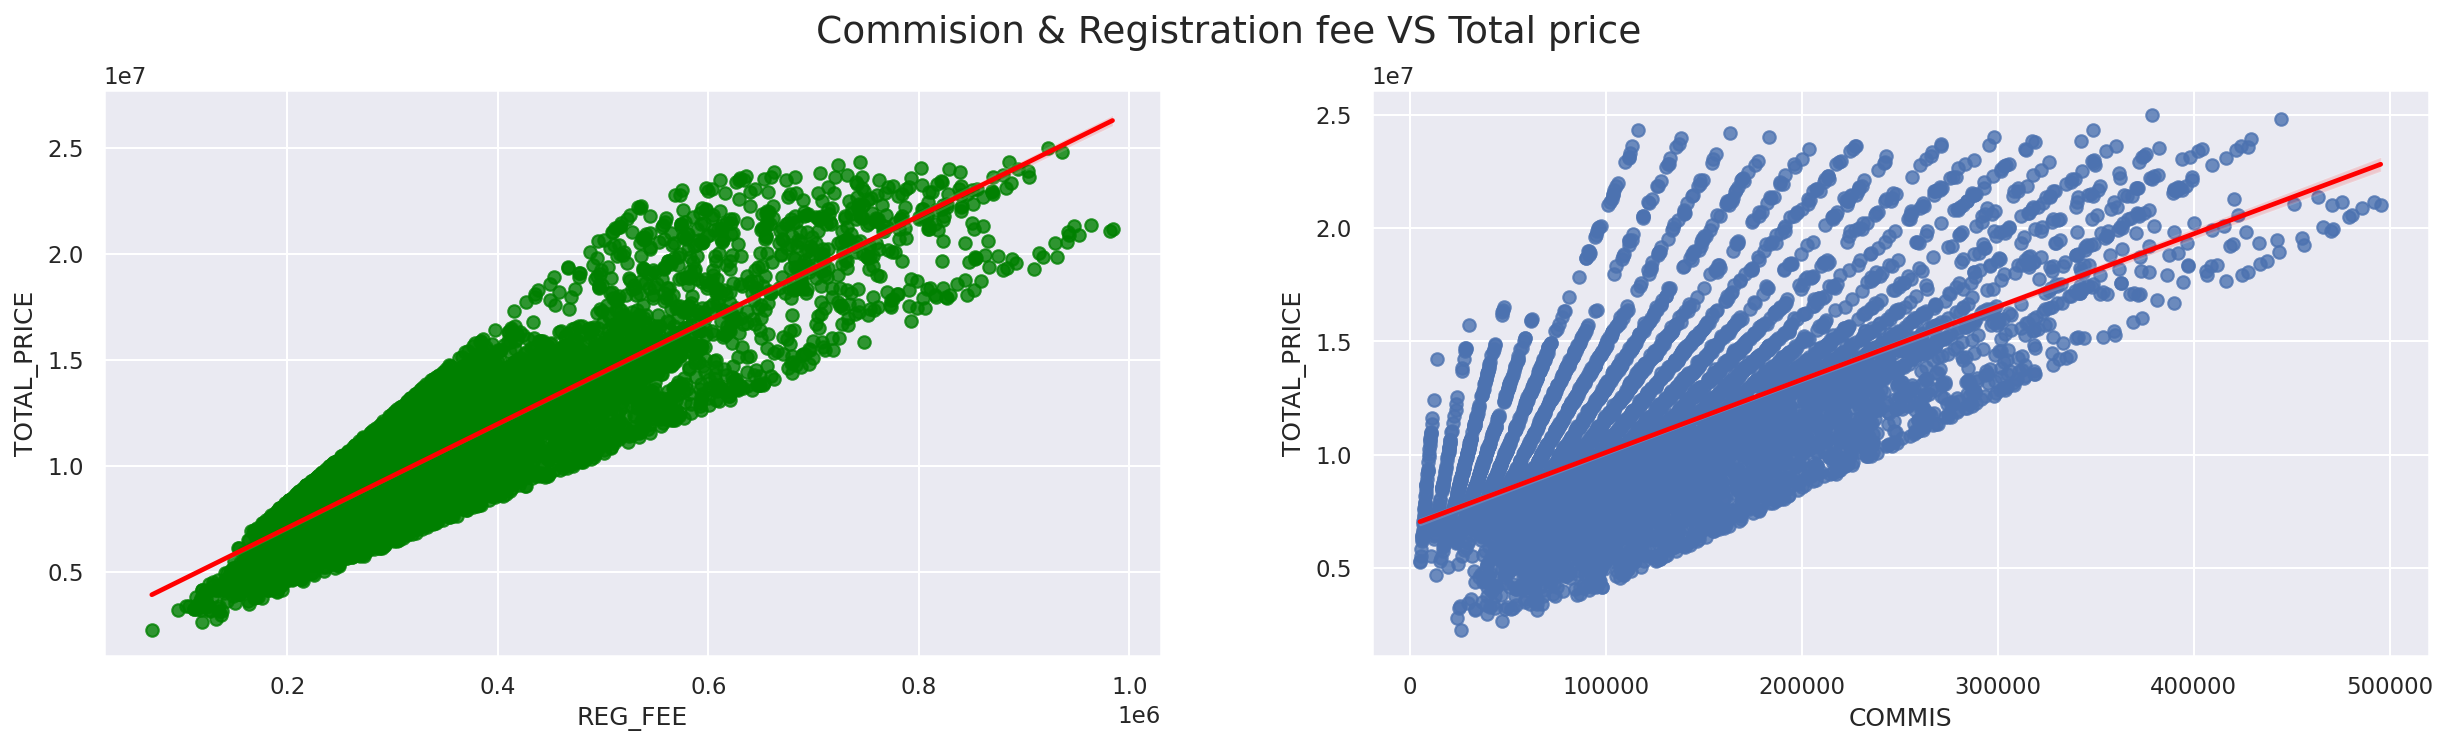

In [32]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(data.REG_FEE, data.TOTAL_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(data.COMMIS, data.TOTAL_PRICE, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

# **Categorical Columns**

---


# Plotting of Categorical data vs Target 

---


Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total sales.

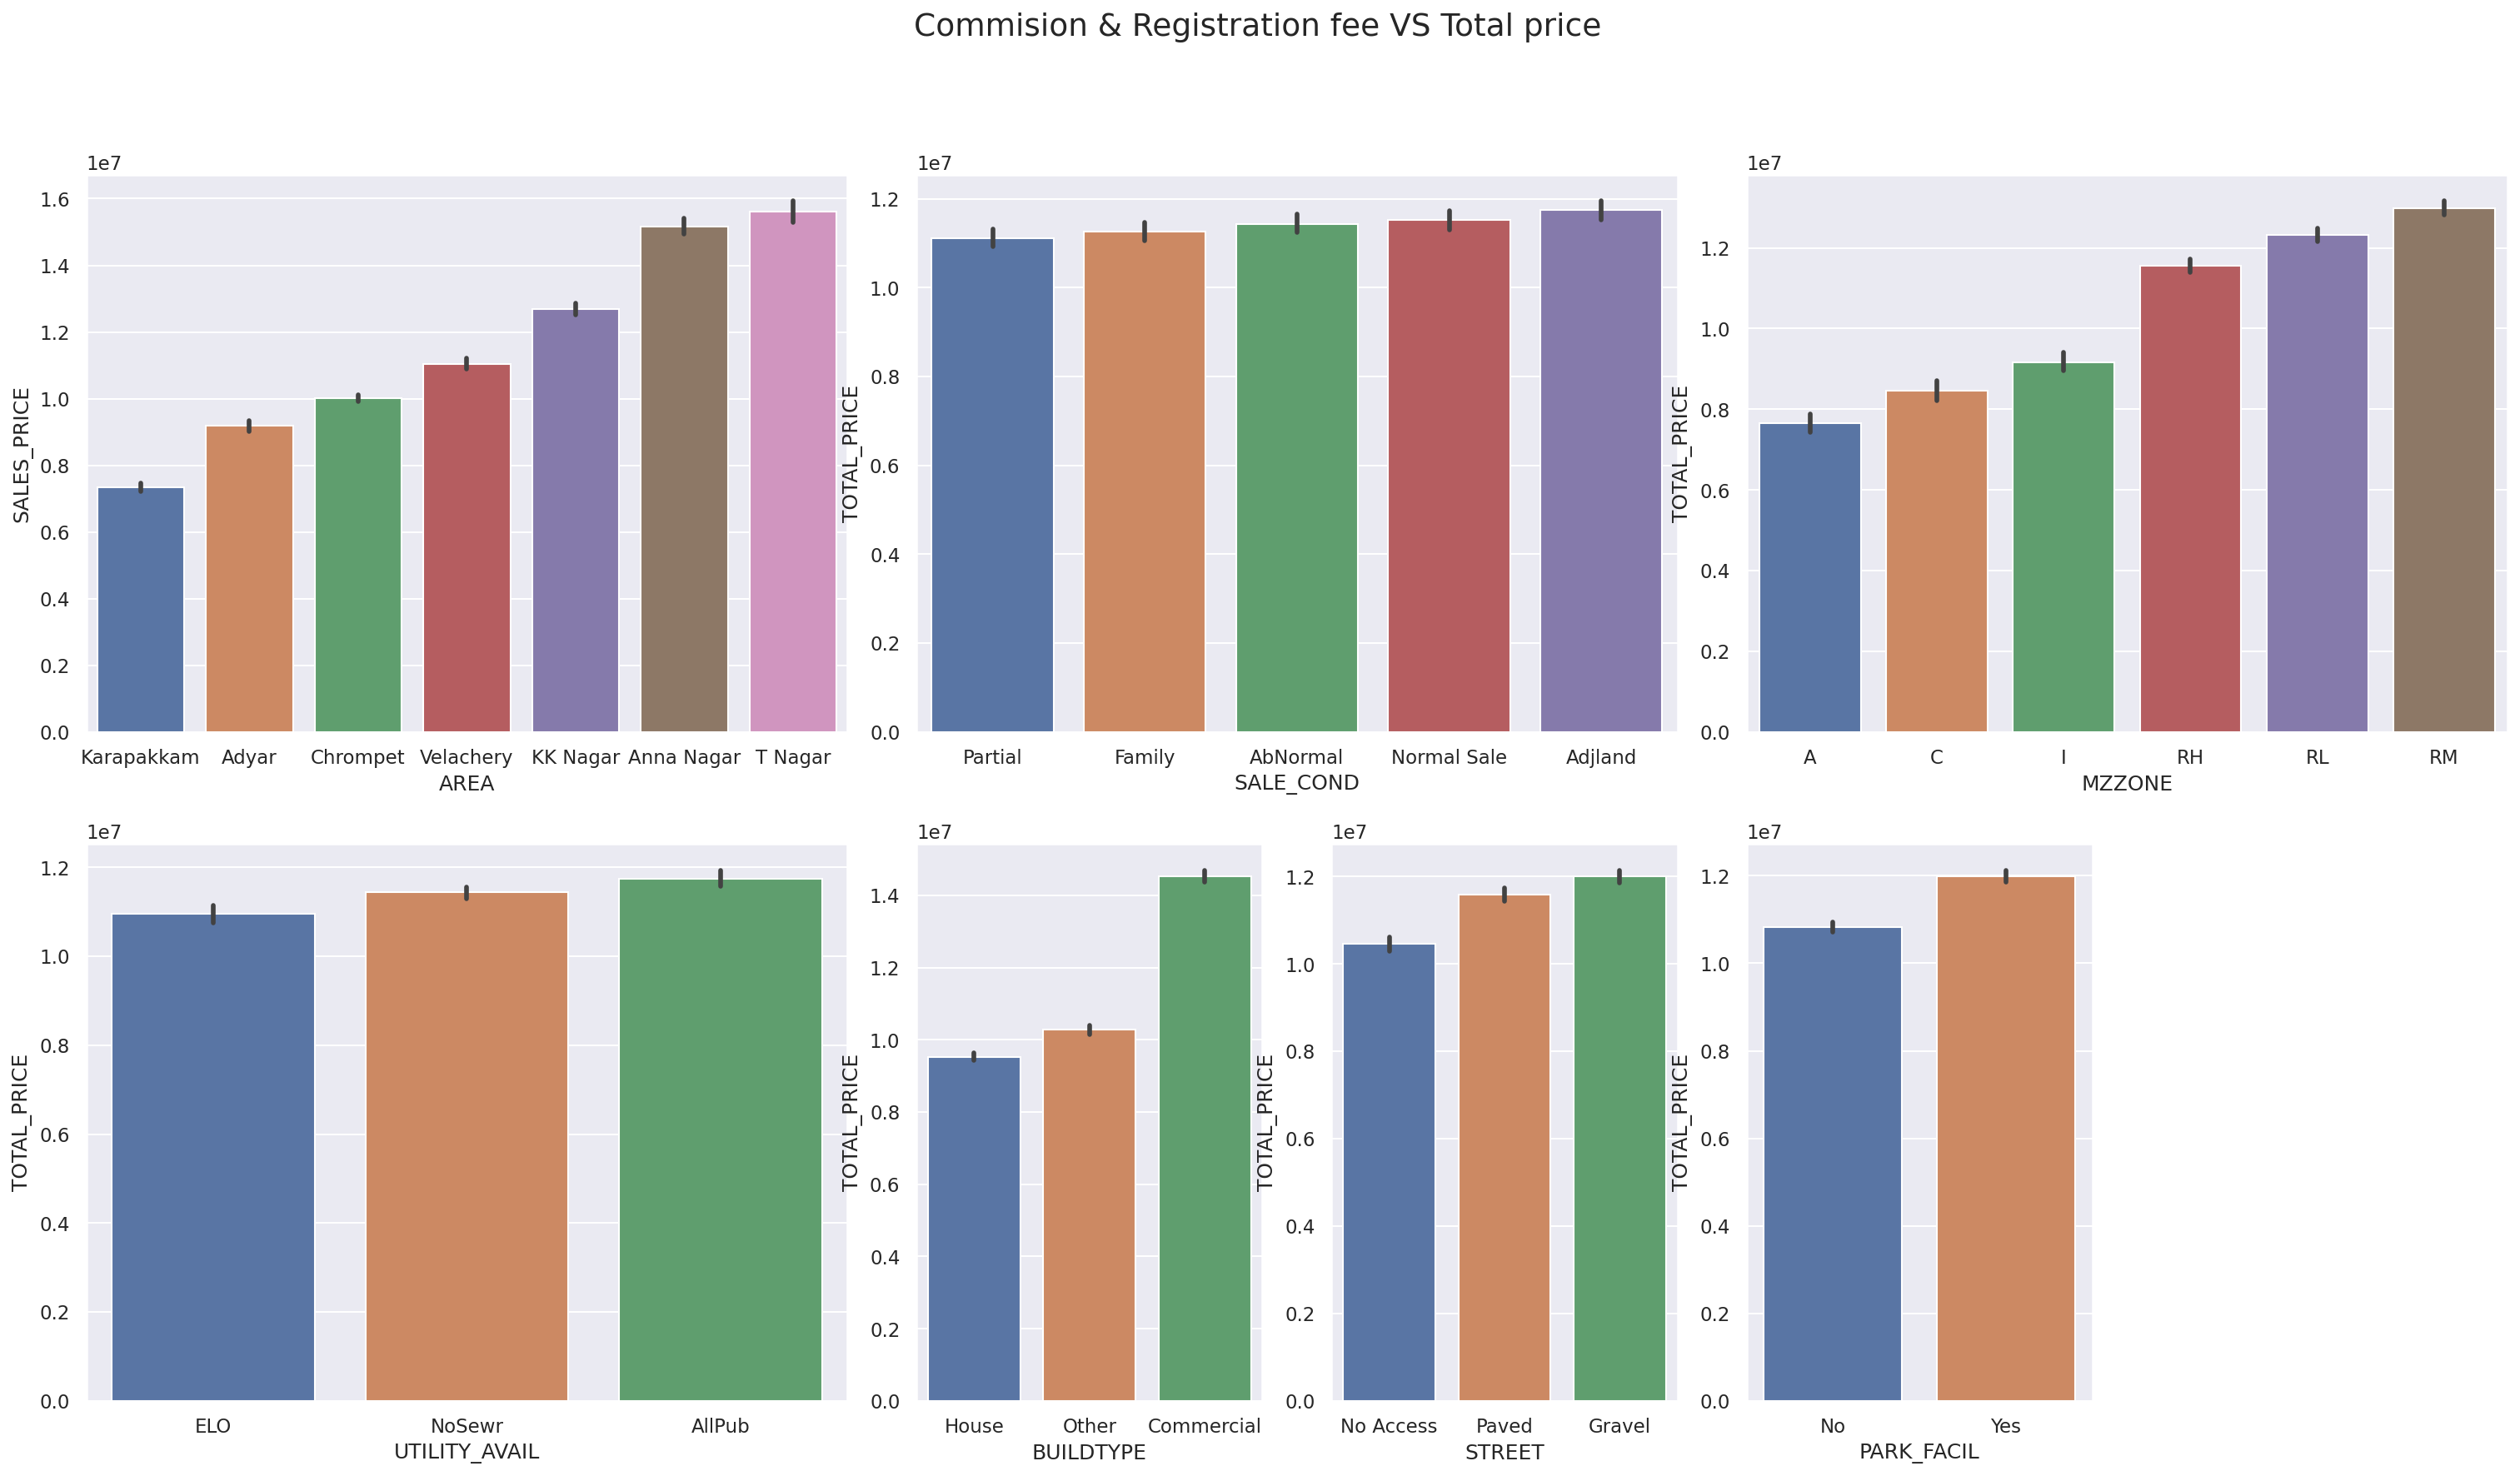

In [33]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.SALE_COND,y=data.TOTAL_PRICE,order=data.groupby('SALE_COND')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.MZZONE,y=data.TOTAL_PRICE,order=data.groupby('MZZONE')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.UTILITY_AVAIL,y=data.TOTAL_PRICE,order=data.groupby('UTILITY_AVAIL')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.BUILDTYPE,y=data.TOTAL_PRICE,order=data.groupby('BUILDTYPE')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.STREET,y=data.TOTAL_PRICE,order=data.groupby('STREET')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.PARK_FACIL,y=data.TOTAL_PRICE,order=data.groupby('PARK_FACIL')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['PARK_FACIL'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Interpretation:-

---



Here we can come to conclusion that:

*   In AREA when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*  In SALE_COND when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In MZZONE when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*  In UTILITY_AVAIL when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*  In BUILDTYPE when we sort column in respect of total_price we didn't find linear relation in this categorical feature but it may beimportant for us so we will keep it and do OneHotEncoding on this column data.
*   In STREET when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

*  In PARK_FACIL when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

# **Encoding**


---


--
From here onwards encoding of data will start in for categorical data in sequential manner in numerical so that computer can understand those data columns.

#**Label Encoder (Mapping)**

---


Here we are encoding ordinal categorical columns which have some order present in them and we havr to preserve the order so here we use Lebel/Ordinal encoder. So, for simplicity i have just simply mappes the values in order of the data.



In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
import pandas as pd
import numpy as np

In [37]:
# Encoding the area column order-wise 
data.AREA = data.AREA.map({'Karapakkam' :1,
                           'Adyar': 2, 
                           'Chrompet' : 3,
                           'Velachery' : 4,
                           'KK Nagar' : 5, 
                           'Anna Nagar' : 6,
                           'T Nagar' : 7})

# Encoding the sale_cond column order-wise 
data.SALE_COND = data.SALE_COND.map({'Partial' : 1, 
                                     'Family' : 2, 
                                     'AbNormal' : 3, 
                                     'Normal Sale' : 4,
                                     'Adjland' : 5})

# Encoding the park_facil column order-wise 
data.PARK_FACIL = data.PARK_FACIL.map({'Yes':1,
                                       'No':0})

# Encoding the utility_avail column order-wise 
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'ELO' : 1, 
                                             'NoSewr' : 2, 
                                             'AllPub' : 3})
                                          
# Encoding the street column order-wise 
data.STREET = data.STREET.map({'No Access' : 1,
                               'Paved' : 2, 
                               'Gravel' : 3})


# Encoding the mzzone column order-wise 
data.MZZONE = data.MZZONE.map({'A' : 1,
                               'C' : 2,
                               'I' : 3,
                               'RL' : 5,
                               'RH' : 4,
                               'RM' : 6})
#Encoding the buildtype column order-wise 
data.BUILDTYPE = data.BUILDTYPE.map({'Commercial': 1 , 
                                     'House': 2 , 
                                     'Other' : 3})

In [38]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
data = data.reindex(columns = ['AREA', 'SALE_COND', 'PARK_FACIL', 
      'BUILDTYPE', 'UTILITY_AVAIL','STREET', 'MZZONE', 'PROPERTY_AGE', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
      'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_PRICE'])

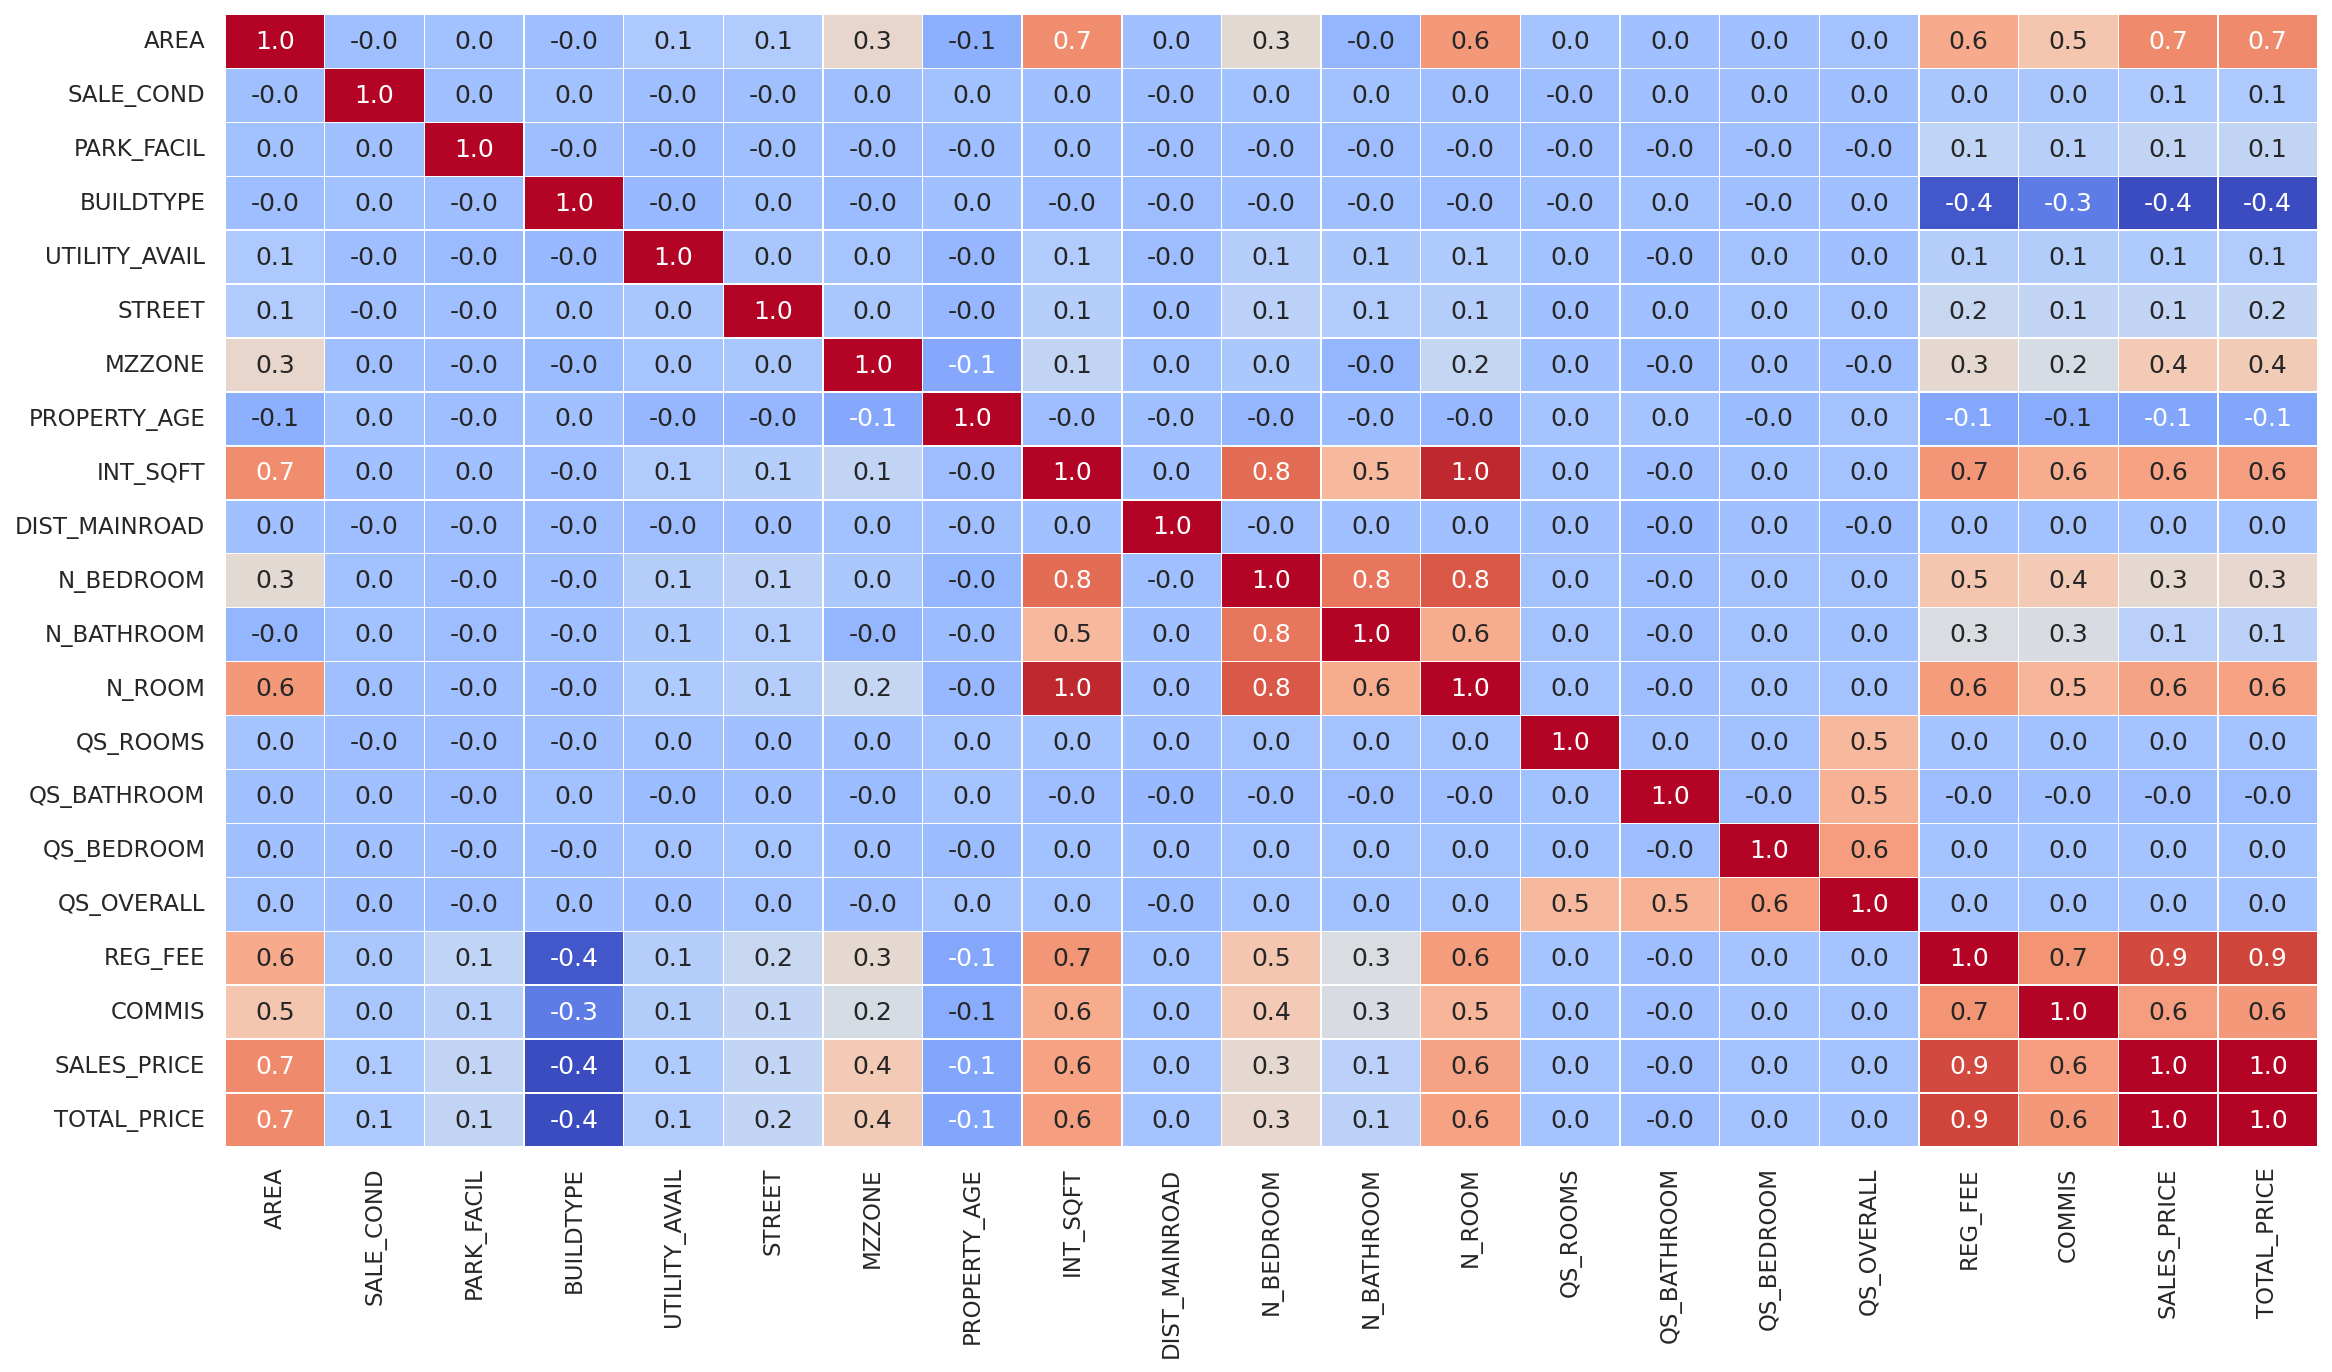

In [39]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

Interpretation:-

---





Here after encoding all columns we can see that in categorical columns also there are some correlation between target and features as we can there is a very good correlation between some columns of our data which are soon in reddish colour.

In [40]:
data.head(3)

AREA  SALE_COND  PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  \
0     1          3           1          1              3       2       1   
1     6          3           0          1              3       3       4   
2     2          3           1          1              1       3       5   

   PROPERTY_AGE  INT_SQFT  DIST_MAINROAD  ...  N_BATHROOM  N_ROOM  QS_ROOMS  \
0            44      1004            131  ...           1       3       4.0   
1            11      1986             26  ...           1       5       4.9   
2            20       909             70  ...           1       3       4.1   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0          3.9         4.9       4.330   380000  144400      7600000   
1          4.2         2.5       3.765   760122  304049     21717770   
2          3.8         2.2       3.090   421094   92114     13159200   

   TOTAL_PRICE  
0      8124400  
1     22781941  
2     13672408  

[3 rows x 21 columns]

In [41]:
data

AREA  SALE_COND  PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  \
0        1          3           1          1              3       2       1   
1        6          3           0          1              3       3       4   
2        2          3           1          1              1       3       5   
3        4          2           0          3              2       2       3   
4        1          3           1          3              3       3       2   
...    ...        ...         ...        ...            ...     ...     ...   
7104     1          5           0          3              1       1       6   
7105     4          2           1          3              2       1       4   
7106     4          4           0          2              2       3       3   
7107     1          1           1          1              1       2       5   
7108     4          1           1          3              1       2       3   

      PROPERTY_AGE  INT_SQFT  DIST_MAINROAD  ...  N_BATHROOM  N_ROOM  \
0               44      1004            131  ...           1       3   
1               11      1986             26  ...           1       5   
2               20       909             70  ...           1       3   
3               22      1855             14  ...           2       5   
4               30      1226             84  ...           1       3   
...            ...       ...            ...  ...         ...     ...   
7104            49       598             51  ...           1       2   
7105             9      1897             52  ...           2       5   
7106            28      1614            152  ...           1       4   
7107            32       787             40  ...           1       2   
7108            44      1896            156  ...           2       5   

      QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0          4.0          3.9         4.9       4.330   380000  144400   
1          4.9          4.2         2.5       3.765   760122  304049   
2          4.1          3.8         2.2       3.090   421094   92114   
3          4.7          3.9         3.6       4.010   356321   77042   
4          3.0          2.5         4.1       3.290   237000   74063   
...        ...          ...         ...         ...      ...     ...   
7104       3.0          2.2         2.4       2.520   208767  107060   
7105       3.6          4.5         3.3       3.920   346191  205551   
7106       4.3          4.2         2.9       3.840   317354  167028   
7107       4.6          3.8         4.1       4.160   425350  119098   
7108       3.1          3.5         4.3       3.640   349177   79812   

      SALES_PRICE  TOTAL_PRICE  
0         7600000      8124400  
1        21717770     22781941  
2        13159200     13672408  
3         9630290     10063653  
4         7406250      7717313  
...           ...          ...  
7104      5353000      5668827  
7105     10818480     11370222  
7106      8351410      8835792  
7107      8507000      9051448  
7108      9976480     10405469  

[7109 rows x 21 columns]

In [42]:
# Removing unnecessary features thich has negligible relation with total_price
data = data.copy()
data.drop(['QS_OVERALL', 'DIST_MAINROAD', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_ROOMS', 'REG_FEE',	'COMMIS'], axis=1, inplace=True)

In [43]:
input_cols = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'PROPERTY_AGE',
              'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM']

target_cols = 'SALES_PRICE'
target1_cols = 'TOTAL_PRICE'

input = data[input_cols].copy()
target = data[target_cols].copy()
target1 = data[target1_cols].copy()


# **Splitting the data for training and testing**

---



In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

# **Scaling the data**
---

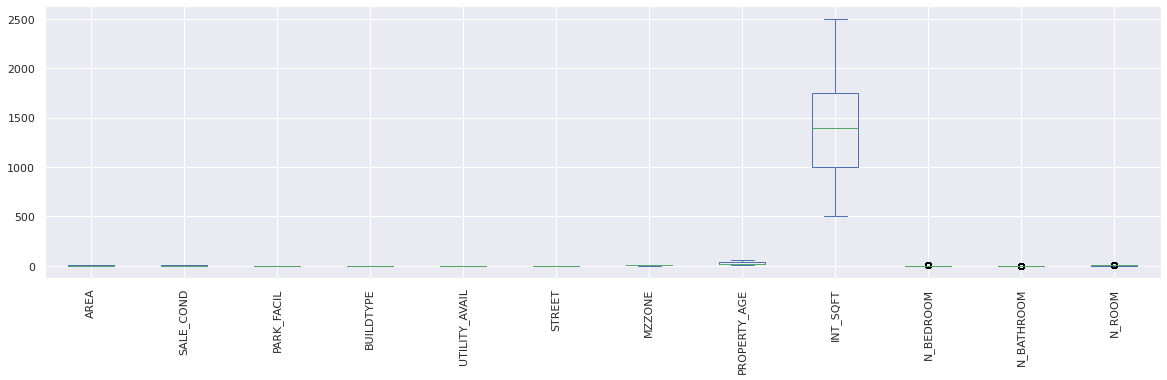

In [45]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

Interpretation:-

Here we can clearly see in our features column int_sqft is the only feature which which contains very large value and all the remaining of the feature column are pretty small.

  # **Importing** **libraries** 

---



In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

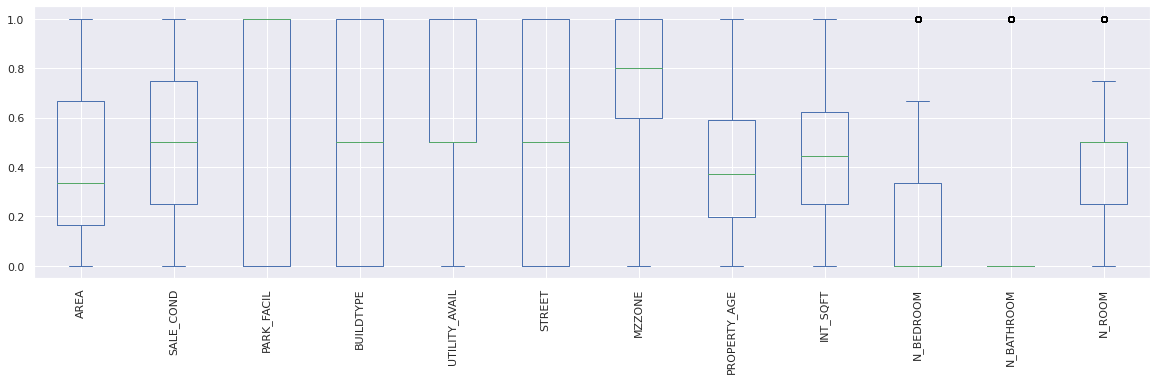

In [47]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

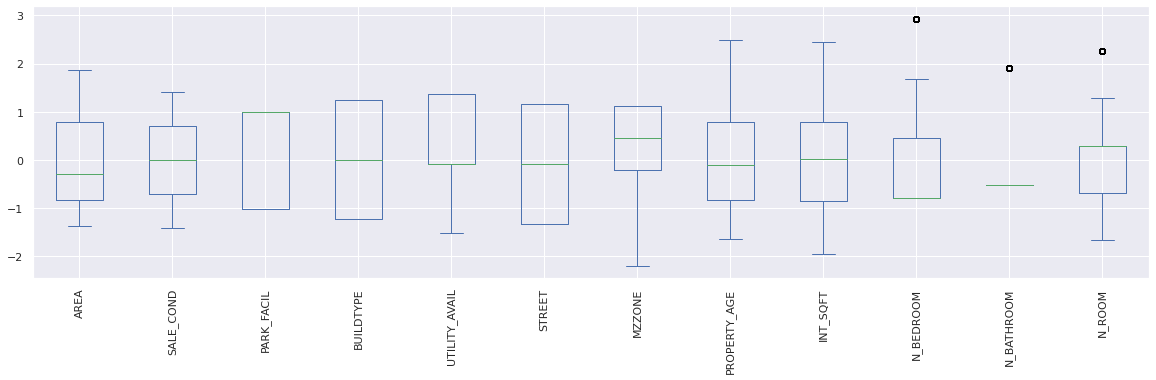

In [48]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()


 **Interpretation:-**

---



Here with the help of MinMaxScaler and StandardScaler we are trying to scale the data so that the spread of values between all the features become equal so that the model which train the data by using distace distance doesn't get very large values as their features.

# **Model** **Training**

---



From here on we will start building model on top of data which we have prepared till now and we will try all different kind of machine learning models and try to get best r-square score for all 3 type of data that are normaldata, MinMaxScaled data and StandardScaler data.

# **Importing Libraries**

---



In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

# **Linear Regression**

---



In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.8107406715291916


In [51]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))


R2- SCORE(Standardscaler): 0.8107406715291918


In [52]:
lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE(Minmaxscaled): 0.8107406715291917


# KNearestNeighbors

---



Orange and Blue depict RSME for MinMaxScaler and blue


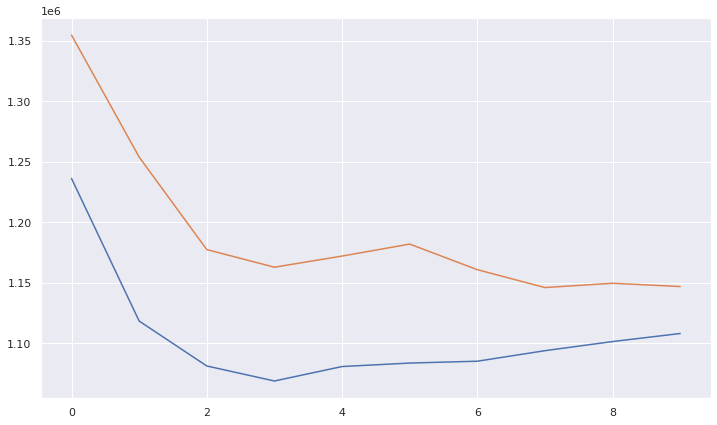

In [53]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [54]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.43790627798053994
R2- SCORE(Minmaxscaled): 0.9168740469664793
R2- SCORE(Standardscaler): 0.9038365414235667


# **Decision** **Tree**

---



In [55]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.9737254303049434
R2- SCORE(Minmaxscaled): 0.9739973265977878
R2- SCORE(Standardscaler): 0.9738872529044076


# **Ensamble** **Learning** 

---



#  Voting Regressor

In [56]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_ss, y_train);
y_pred_vrss = vr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

vr.fit(X_train_mm, y_train);
y_pred_vrmm = vr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

R2- SCORE: 0.971389418392953
R2- SCORE(Standardscaler): 0.9806082473432659
R2- SCORE(MinMaxScaler): 0.971389418392953


# **Random Forest**

---






In [57]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9870210237025585
R2- SCORE(minmaxscaled): 0.9874583988997392
R2- SCORE(Standardscaler): 0.9868748030864749


#**Extra Tree Regressor**

---



In [58]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2- SCORE: 0.9909120405282816
R2- SCORE(minmaxscaled): -2.92577606942954
R2- SCORE(Standardscaler): -2.418128500508657


# Gradient Boosting Regressor

---



In [59]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9913035077916679  Test score :  0.9896287361727126
Learning rate :  0.3  Train score :  0.9970340189285843  Test score :  0.9959195276686401
Learning rate :  0.5  Train score :  0.9971631505122192  Test score :  0.9961392237903235
Learning rate :  0.8  Train score :  0.9981783259214773  Test score :  0.997220701156733
Learning rate :  1  Train score :  0.9979371988231457  Test score :  0.9970536810048596


In [60]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9961392237903235
R2- SCORE(MinMaxScaler): 0.9961437071126933
R2- SCORE(Standardscaler): 0.9961405933580212


# **XGBoost**

---



In [61]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9966881283106592  Test score :  0.9956492493785439
Learning rate :  0.5  Train score :  0.9974563596049737  Test score :  0.9964739755197486
Learning rate :  0.7  Train score :  0.9975974186157465  Test score :  0.9964482282069431
Learning rate :  0.8  Train score :  0.997878116541444  Test score :  0.9969369486248577
Learning rate :  1  Train score :  0.9979066036770018  Test score :  0.9970802109928293


In [62]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9964482282069431
R2- SCORE(MinMaxScaler): 0.996452386726847
R2- SCORE(Standardscaler): 0.9964496304507635


Interpretation:-

---



Here after training all kinds of model we can see that MinMaxScaled or StandardScaled data model doesn't matter make much difference they give very similar results. But we can surely say that GradientBoostingRegressor and XGBRegressor outperformed most of the machine learning model and GradientBoostingRegressor give 0.99693 as R2-score and XGBRegressor gives 0.997693 as R2-score and I would also like to mention ExtraTreesRegressor with R2-score of 0.99094. The results of all the models of the child being trained in this project I mentioned below:


  
*   GradientBoostingRegressor give score of 0.99613 as R2-score.
*   XGBRegressor gives score of 0.99644 as R2-score.
*   ExtraTreesRegressor gives score of 0.99091 as R2-score.
*   RandomForestRegressor gives score of 0.98723 as R2-score.
*   LinearRegression gives score of 0.81074 as R2-score.
*   KNeighborsRegressor gives score of 0.90383 as R2-score.
*   VotingRegressor gives score of 0.97128 as R2-score.
*   Decision Tree gives score of 0.97415544 as R2-score.










# **Conclusion:**

---
Through this Machine Learning project we can conclude that there are so many aspects of training machine learning model fitst we have to clean the data and try to get all the features in a suitable format. There are many variables and features which which play their part in setting the price of the house in this particular dataset so we have to keep all the columns or features into consideration while training the model we should focus as much as possible an explorer tree data analysis and try to find the pattern in categorical data also any medical data we can find pattern through various Matrix but in categorical data we have to get enough time to find a relation between two variables is that there is no linear relation then we can try to transform the data but here that was not the case after that we encoded our categorical column in order for ordinal data and by one hot encoder for nominal data and removed all the columns which have no relation with target columns. After that it comes the training the machine learning model part and here we train data with as many model as possible and try to get the best possible RS Square score as we can and at the end we finalise a model with highest RS Square score for this data which gave score of more than 99% (99.644% to be exact).
